In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
center = cv2.imread('./Dataset/center.jpeg')
center = cv2.cvtColor(center,cv2.COLOR_BGR2RGB)
bottom_left = cv2.imread('./Dataset/bottom_left.jpg')
bottom_left = cv2.cvtColor(bottom_left,cv2.COLOR_BGR2RGB)
bottom_right = cv2.imread('./Dataset/bottom_right.jpg')
bottom_right = cv2.cvtColor(bottom_right,cv2.COLOR_BGR2RGB)
top_left = cv2.imread('./Dataset/top_left.jpg')
top_left = cv2.cvtColor(top_left,cv2.COLOR_BGR2RGB)
top_right = cv2.imread('./Dataset/top_right.jpg')
top_right = cv2.cvtColor(top_right,cv2.COLOR_BGR2RGB)

In [4]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(225, 225, 3)
(434, 400, 3)
(300, 300, 3)
(570, 570, 3)
(228, 300, 3)


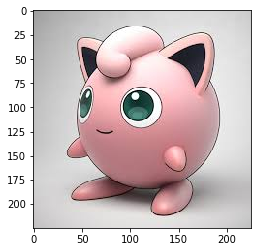

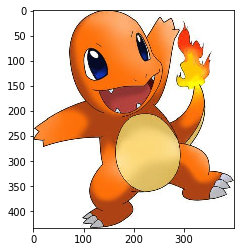

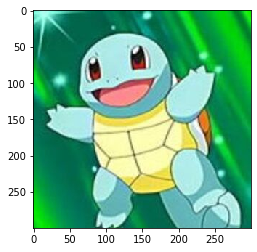

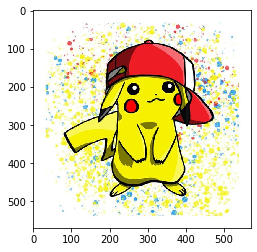

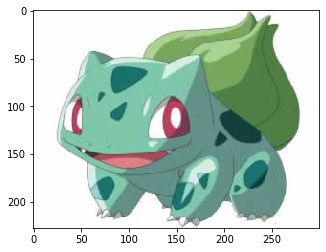

In [3]:
plt.imshow(center)
plt.show()
plt.imshow(bottom_left)
plt.show()
plt.imshow(bottom_right)
plt.show()
plt.imshow(top_left)
plt.show()
plt.imshow(top_right)
plt.show()


# Resizing Image

In [5]:
center = cv2.resize(center,(100,100))
bottom_left = cv2.resize(bottom_left,(200,200))
bottom_right = cv2.resize(bottom_right,(200,200))
top_left = cv2.resize(top_left,(200,200))
top_right = cv2.resize(top_right,(200,200))

In [6]:
print(center.shape)
print(bottom_left.shape)
print(bottom_right.shape)
print(top_left.shape)
print(top_right.shape)

(100, 100, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


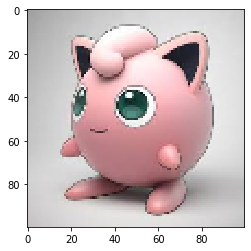

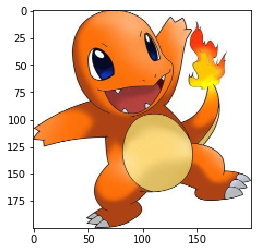

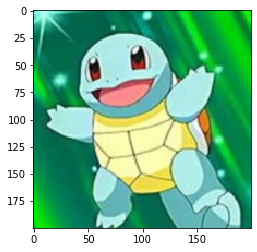

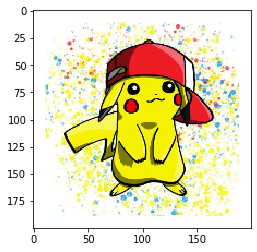

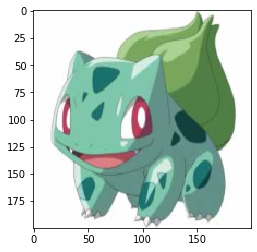

In [7]:
plt.imshow(center)
plt.show()
plt.imshow(bottom_left)
plt.show()
plt.imshow(bottom_right)
plt.show()
plt.imshow(top_left)
plt.show()
plt.imshow(top_right)
plt.show()

In [130]:
def create_blank_black_canvas(width, height):
    image = np.zeros((height, width, 3), np.uint8)
    return image
#uint8 is used unsigned 8 bit integer. And that is the range of pixel.
#We can't have pixel value more than 2^8 -1. Therefore, for images uint8 type is used. Whereas double is used to handle very big numbers

In [163]:
canvas = create_blank_black_canvas(430, 430)

In [164]:
canvas

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

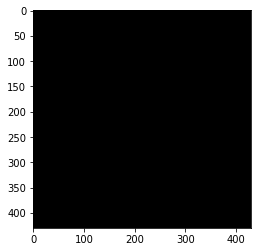

In [165]:
plt.imshow(canvas)

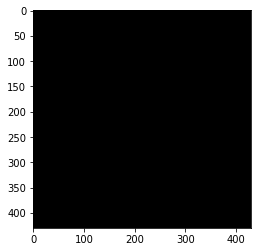

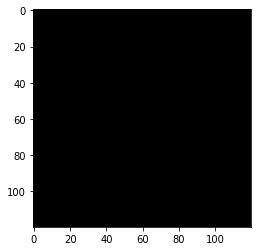

In [166]:
canvas_for_center = create_blank_black_canvas(120, 120)
plt.imshow(canvas)
plt.show()
plt.imshow(canvas_for_center)
plt.show()

(120, 120, 3)


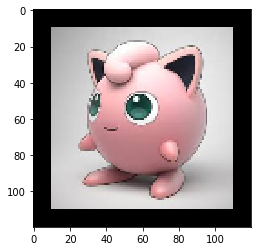

In [167]:
#this is for making one image over other !!
canvas_for_center[10:110,10:110] = center
print(canvas_for_center.shape)
plt.imshow(canvas_for_center)
plt.show()


In [168]:
275-155

120

In [169]:
# canvas[280:400,280:400] = canvas_for_center 
# plt.imshow(canvas)
# plt.show()

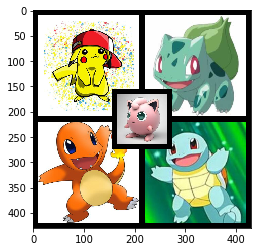

In [180]:
canvas[10:210,10:210] = top_left
canvas[10:210,220:420] = top_right
canvas[220:420,10:210] = bottom_left
canvas[220:420,220:420] = bottom_right
canvas[155:275,155:275] = canvas_for_center
plt.imshow(canvas)
plt.show()

In [181]:
cv2.imwrite("collage_img.jpg",canvas)#The function imwrite saves the image to the specified file.

True

In [172]:
canvas = cv2.cvtColor(canvas,cv2.COLOR_RGB2BGR)


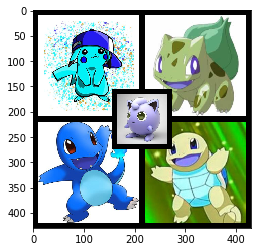

(430, 430, 3)


In [173]:
plt.imshow(canvas)
plt.show()
print(canvas.shape)

In [174]:
r_channel = canvas[:,:,2]
g_channel = canvas[:,:,1]
b_channel = canvas[:,:,0]


In [175]:
r_channel = r_channel.reshape((430*430,1))
g_channel = g_channel.reshape((430*430,1))
b_channel = b_channel.reshape((430*430,1))
#np.hstack() read documentation
img = np.hstack((r_channel,g_channel,b_channel))

In [176]:
print(img.shape)


(184900, 3)


In [177]:
#we can only convert  2d img into DF
df = pd.DataFrame(img,columns=['r','g','b'])


In [178]:
df

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
184895,0,0,0
184896,0,0,0
184897,0,0,0
184898,0,0,0


In [179]:
df.to_csv("Final_Collage.csv",index=False)